# We Rate Dogs Data Wrangling Project for Udacity Data Professional Track

### By: Asem Saafan

In [1]:
#IMPORTING ALL NECESSARY LIBRARIES NEEDED FOR THE PROJECT
import numpy as np
import pandas as pd
import requests 
import os
import tweepy

## Gatherinig the Data

#### 1- Enhanced Twitter Archive CSV

In [2]:
#Reading the Twitter Archive Enhanced CSV File
enhanced_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
enhanced_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Running Info to get more info and NaN values overview
enhanced_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2- Image Predictions TSV File

In [5]:
# URL for image file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#get the response
response = requests.get(url)
response

<Response [200]>

In [6]:
#previewing the response we get
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [7]:
#CREATING a folder for image predictions data if not existed
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
#WRITING the image predictions data to a file into the folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [9]:
#CREATING DATAFRAME FROM THE TSV
image_predictions_df = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [10]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#Running Info to get more info and NaN values overview
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3- GETTING DATA FROM TWITTER API

In [15]:
# TWITTER API AUTHENTICATION FOR DEVELOPER ACCOUNT
consumer_key = 'p5HOdemb8pRpTS**********'
consumer_secret = '6eZl45YHUxwYRLmbd2bqpweJ**************************'
access_token = '3354671547-GeCrcSRMSiCWPrLl2bp********************'
access_secret = 'WrsxcAjWJuwPuF74H0rnL0***********************'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [12]:
# GETTING THE LIST OF IDs FROM OUR TWITTER_DF
tweet_id = enhanced_twitter_archive['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [17]:
#Check WHAT WE NEED FROM THE TWEETS AS IT MAY HAVE MORE INFO
#tweet = api.get_status(tweet_id[0])
#tweet

In [18]:
tweet_id = enhanced_twitter_archive['tweet_id']

# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)

892420643555336193 35811 7586
892177421306343426 30920 5622
891815181378084864 23269 3719
891689557279858688 39093 7766
891327558926688256 37341 8361
891087950875897856 18815 2806
890971913173991426 10934 1824
890729181411237888 60348 16956
890609185150312448 25899 3860
890240255349198849 29575 6603
890006608113172480 28467 6588
889880896479866881 25905 4481
889665388333682689 44594 8984
889638837579907072 25100 4031
889531135344209921 14067 2028
889278841981685760 23362 4796
888917238123831296 27009 4039
888804989199671297 23706 3806
888554962724278272 18304 3118
888078434458587136 20233 3122
887705289381826560 28110 4856
887517139158093824 43062 10598
887473957103951883 63804 16179
887343217045368832 31262 9434
887101392804085760 28439 5369
886983233522544640 32375 6888
886736880519319552 11107 2882
886680336477933568 20874 4021
886366144734445568 19607 2849
886267009285017600 111 4
886258384151887873 25983 5686
886054160059072513 0 100
885984800019947520 30246 6047
88552894320547020

838083903487373313 17443 3082
837820167694528512 33748 7739
837482249356513284 3824 437
837471256429613056 12664 2238
836989968035819520 12645 2269
836753516572119041 19180 4584
836677758902222849 12525 2198
836648853927522308 0 550
836397794269200385 0 27147
836380477523124226 14656 2954
836260088725786625 21151 4253
836001077879255040 18932 4202
835685285446955009 0 8039
835574547218894849 17659 3576
835536468978302976 0 1674
835309094223372289 0 20679
835297930240217089 16353 2977
835264098648616962 7685 1674
835246439529840640 2084 73
835172783151792128 25976 5700
835152434251116546 22238 2980
834931633769889797 10730 1621
834786237630337024 21238 5436
834574053763584002 13559 2504
834477809192075265 0 10517
834458053273591808 9559 1662
834209720923721728 20448 4699
834167344700198914 15717 3624
834089966724603904 9972 2111
834086379323871233 12980 2186
833863086058651648 13361 2385
833826103416520705 17967 3737
833732339549220864 0 221
833722901757046785 20716 3185
833479644947025

800188575492947969 0 3986
800141422401830912 15433 2567
800018252395122689 28636 13290
799774291445383169 0 4730
799757965289017345 8473 2186
799422933579902976 8154 1943
799308762079035393 0 5519
799297110730567681 9986 2788
799063482566066176 8157 2493
798933969379225600 13215 4500
798925684722855936 7579 1454
798705661114773508 0 6713
798701998996647937 0 7862
798697898615730177 0 6595
798694562394996736 0 5002
798686750113755136 0 2358
798682547630837760 0 4774
798673117451325440 0 5603
798665375516884993 0 3951
798644042770751489 0 1874
798628517273620480 0 1997
798585098161549313 0 5749
798576900688019456 0 5911
798340744599797760 0 3363
798209839306514432 10528 2589
797971864723324932 11706 3142
797545162159308800 14696 4909
797236660651966464 20149 6641
797165961484890113 226 26
796904159865868288 0 9013
796865951799083009 7766 1940
796759840936919040 11946 3059
796563435802726400 0 7340
796484825502875648 7648 1777
796387464403357696 11107 4180
796177847564038144 0 14405
79614

761334018830917632 5177 1442
761292947749015552 4467 1080
761227390836215808 5305 1557
761004547850530816 11283 3453
760893934457552897 3801 969
760656994973933572 6561 1900
760641137271070720 4961 1290
760539183865880579 7534 3598
760521673607086080 4201 1382
760290219849637889 26672 11407
760252756032651264 3934 864
760190180481531904 5680 1787
760153949710192640 0 30
759943073749200896 5927 2063
759923798737051648 14615 5610
759846353224826880 6705 1952
759793422261743616 5926 1893
759557299618865152 4670 1177
759447681597108224 8443 2439
759446261539934208 1662 484
759197388317847553 6048 1932
759159934323924993 0 1147
759099523532779520 14441 4139
759047813560868866 6445 1994
758854675097526272 3532 890
758828659922702336 11168 3815
758740312047005698 5708 1605
758474966123810816 3783 991
758467244762497024 4758 2194
758405701903519748 5187 1894
758355060040593408 3378 1060
758099635764359168 18966 9906
758041019896193024 2688 369
757741869644341248 6847 3227
757729163776290825 0 

724004602748780546 4107 1507
723912936180330496 3813 1208
723688335806480385 7524 2873
723673163800948736 2956 871
723179728551723008 5208 1822
722974582966214656 4030 1532
722613351520608256 4863 1602
721503162398597120 4529 1791
721001180231503872 2483 598
720785406564900865 3048 752
720775346191278080 2409 647
720415127506415616 4045 1467
720389942216527872 6237 2448
720340705894408192 2806 957
720059472081784833 3789 1103
720043174954147842 4820 1966
719991154352222208 4750 1703
719704490224398336 4449 1395
719551379208073216 4947 1856
719367763014393856 2742 728
719339463458033665 4347 1205
719332531645071360 3360 927
718971898235854848 3422 1052
718939241951195136 5150 1720
718631497683582976 18521 7862
718613305783398402 2395 472
718540630683709445 2407 996
718460005985447936 2647 514
718454725339934721 4771 1479
718246886998687744 1870 487
718234618122661888 3791 966
717841801130979328 2405 592
717790033953034240 2824 1087
717537687239008257 5665 1812
717428917016076293 1580 43

696405997980676096 3155 1137
696100768806522880 1897 640
695816827381944320 2968 1146
695794761660297217 3113 755
695767669421768709 1826 729
695629776980148225 4499 2052
695446424020918272 4336 1782
695409464418041856 8549 3510
695314793360662529 3579 1423
695095422348574720 2596 602
695074328191332352 2801 1071
695064344191721472 1577 582
695051054296211456 2624 779
694925794720792577 2650 902
694905863685980160 2709 920
694669722378485760 35270 14106
694356675654983680 1480 282
694352839993344000 2001 604
694342028726001664 1556 478
694329668942569472 1967 494
694206574471057408 4105 2005
694183373896572928 2916 913
694001791655137281 3351 1009
693993230313091072 1849 395
693942351086120961 1720 362
693647888581312512 2635 574
693644216740769793 1328 122
693642232151285760 2498 406
693629975228977152 2410 779
693622659251335168 1506 368
693590843962331137 4970 1923
693582294167244802 1615 242
693486665285931008 1746 623
693280720173801472 3299 1215
693267061318012928 2344 802
693262

679503373272485890 3109 1434
679475951516934144 2051 624
679462823135686656 30922 18332
679405845277462528 2324 1171
679158373988876288 20829 7831
679148763231985668 2717 997
679132435750195208 2921 1125
679111216690831360 5842 2522
679062614270468097 16575 7861
679047485189439488 2200 647
679001094530465792 2770 1188
678991772295516161 2241 1124
678969228704284672 1605 443
678800283649069056 2509 869
678798276842360832 3381 1127
678774928607469569 2747 880
678767140346941444 3454 1322
678764513869611008 1601 462
678755239630127104 6934 3187
678740035362037760 3665 1625
678708137298427904 5473 2364
678675843183484930 2795 1416
678643457146150913 1995 389
678446151570427904 3909 1498
678424312106393600 5342 2469
678410210315247616 4110 1750
678399652199309312 78275 30965
678396796259975168 1554 402
678389028614488064 1823 410
678380236862578688 2377 879
678341075375947776 1692 517
678334497360859136 1274 244
678278586130948096 11155 5922
678255464182861824 1551 354
678023323247357953 18

671763349865160704 1590 850
671744970634719232 1288 716
671743150407421952 717 225
671735591348891648 1371 707
671729906628341761 8090 4108
671561002136281088 12156 6821
671550332464455680 866 198
671547767500775424 1282 555
671544874165002241 1863 992
671542985629241344 1038 533
671538301157904385 881 364
671536543010570240 1111 384
671533943490011136 971 547
671528761649688577 799 242
671520732782923777 1328 499
671518598289059840 899 281
671511350426865664 1508 665
671504605491109889 6640 3351
671497587707535361 875 422
671488513339211776 949 451
671486386088865792 550 183
671485057807351808 724 221
671390180817915904 1371 700
671362598324076544 1048 279
671357843010908160 379 146
671355857343524864 459 113
671347597085433856 909 403
671186162933985280 697 196
671182547775299584 1062 316
671166507850801152 833 324
671163268581498880 1561 1032
671159727754231808 346 75
671154572044468225 675 206
671151324042559489 633 143
671147085991960577 634 202
671141549288370177 1094 620
6711386

666287406224695296 135 60
666273097616637952 159 70
666268910803644416 95 32
666104133288665088 13485 5911
666102155909144576 70 11
666099513787052032 142 58
666094000022159362 154 66
666082916733198337 102 41
666073100786774016 293 144
666071193221509120 135 52
666063827256086533 445 195
666058600524156928 105 52
666057090499244032 267 123
666055525042405380 407 217
666051853826850816 1110 765
666050758794694657 124 51
666049248165822465 96 40
666044226329800704 267 130
666033412701032449 111 41
666029285002620928 120 42
666020888022790149 2382 458


In [25]:
# GETTING THE LENGTH OF LIST WE JUST CREATED
print (len(df_list))

2328


In [26]:
#CREATED A DATAFRAME FROM THIS LIST
json_tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

#CREATING .TXT (FOR HAVING DIFFERENT DATA TYPE) & .CSV (FOR VISUALIZE USING EXCEL)
json_tweets_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)
json_tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

#PREVIEWING THE DF WE JUST CREATED
json_tweets_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,35811,7586
1,892177421306343426,30920,5622
2,891815181378084864,23269,3719
3,891689557279858688,39093,7766
4,891327558926688256,37341,8361


In [ ]:
#GETTING MORE INFO ABOUT THE DF WE CREATED FOR TWEETS 
json_tweets_df.info()

## Assessing the Data 
Assessing the data will be in two shapes, the first is visually using excel or pandas and the second is progromatically using some properties related to pd like info, describe ...

### Issues to clean
The coming list will depend on issues in quality and tidness

##### Data quality dimensions help guide the thought process while assessing as well as cleaning efforts:
- Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rulescan be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs tooheavy because the scale was faulty.
- Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standardformat, in columns that represent the same data across tables and/or within tables is desired


### Issues will be discussed for every file alone

In [28]:
enhanced_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issues in enhanced twitter archive file
###### 1- There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
###### 2- There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
###### 3- The timestamp field is in string format
###### 4- There are 2297 tweets with expanded_urls which mesan that 59 tweets with missing data
###### 5- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
###### 6- The columns related to retweets are not applicable for original tweets
###### 7- The columns related to replies are not applicable for original tweets
###### 8- Some of the rows from the tail() output below have invalid strings in the **name** column, e.g. "a", "an", "in".
###### 9- The important cols are the end of the table 


In [29]:
enhanced_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [30]:
enhanced_twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [31]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Issues in Image Predictions file
###### 1- The p1, p2 ... names are difficult to understand
###### 2- Drop Unneeded cols

In [33]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2328 non-null   int64
 1   favorites      2328 non-null   int64
 2   retweet_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [34]:
json_tweets_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,35811,7586
1,892177421306343426,30920,5622
2,891815181378084864,23269,3719
3,891689557279858688,39093,7766
4,891327558926688256,37341,8361


In [35]:
json_tweets_df.tail()

,tweet_id,favorites,retweet_count
2323,666049248165822465,96,40
2324,666044226329800704,267,130
2325,666033412701032449,111,41
2326,666029285002620928,120,42
2327,666020888022790149,2382,458


### Issues in Image Predictions file
- No issues here as I only get what I needed here

# Cleaning the 3 Data Frames

In [37]:
# CREATE A COPY FROM THE ARCHIVE DF TO SEE COMPARE BETWEEN THEM
archive_clean_df = enhanced_twitter_archive.copy()
image_clean_df = image_predictions_df.copy()
json_clean_df = json_tweets_df.copy() 

In [38]:
# SAVE ALL THE DATA WE GOT IN FILES TO ENSURE THAT WE CAN GET IT ANY TIME
archive_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [89]:
# LOAD CLEAN FILES AGAIN FROM WHAT WE JUST SAVED 
archive_clean_df = pd.read_csv('archive_clean.csv')
image_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')
image_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<STRONG> Merging the data to play with it all in one dataframe </STRONG>
 

In [90]:
#START BY MERGING TWO OF THEM
archive_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id','tweet_id'],how='left') 
archive_master_df = pd.merge(archive_master_df, image_clean_df, on='tweet_id',how='left') 
archive_master_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [91]:
archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [92]:
# SAVE A COPY FROM IT TO HAVE A STARTING POINT OF ANYTHING HAPPENED TO THIS FILE
archive_master_df.to_csv('archive_master_df.csv',encoding='utf-8',index=False)

In [93]:
# READ THE FILE AGAIN FROM WHAT WE SAVED AND WORK AS WE ORDINARY WORK WITH  DF 
df = pd.read_csv('archive_master_df.csv')
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality Issue 1

#### Define

<blockquote> Removing retweets from the master dataframe as we analyze the tweets only

#### Code

In [95]:
# WE WILL START BY REMOVING THE ROWS CONTAINING THE DATA INSIDE IT
# AFTER THAT REMOVING THE COLS ITSELF AFTER CHECKING
df = df[df.retweeted_status_id.isnull()]
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  favorites              2165 non-null   float64
 15  retw

### Quality Issue 2

#### Define

<blockquote> Removing replies from the master dataframe as we analyze the tweets only

#### Code

In [97]:
df = df[df.in_reply_to_status_id.isnull()]
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  favorites           2087 non-null   float64
 13  retweet_count       2087 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

### Quality Issue 3

#### Define

<blockquote> removing the 126 lines which don't have URLs for pics as we will analyze these in the future

#### Code

In [99]:
df = df[df.jpg_url.notnull()]

#### Test

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  favorites           1961 non-null   float64
 13  retweet_count       1961 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

### Tideness Issue 4

#### Define

<Blockquote> Put all dog stages 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_stage' to apply the tideness rule that every column provide one and new info

In [101]:
#CHECKING FIRST HOW MANY EACH STAGES APEAR

In [102]:
df['doggo'].value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [103]:
df['floofer'].value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [104]:
df['pupper'].value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [105]:
df['puppo'].value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

#### Code

In [106]:
# FIRST GET THE LIST OF THE DF HEADERS AND CREATE NEW ONE BASED ON IT AND REPLACE IT WITH THE OLD ONE BY USING 
# MELT FUNCTION

In [107]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [108]:
new_df = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_stage')

#### Test

In [109]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7884 non-null   int64  
 1   timestamp           7884 non-null   object 
 2   source              7884 non-null   object 
 3   text                7884 non-null   object 
 4   expanded_urls       7884 non-null   object 
 5   rating_numerator    7884 non-null   int64  
 6   rating_denominator  7884 non-null   int64  
 7   name                7884 non-null   object 
 8   favorites           7844 non-null   float64
 9   retweet_count       7844 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [110]:
new_df.dog_stage.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [111]:
#THE MELTING DOUPLED THE NUMBER OF ROWS SO WE NEED TO FIX THAT

### Quality Issue 5

#### Define

<blockquote> The Melting Doupled the number of rows so we need to remove it

#### Code

In [112]:
new_df = new_df.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [113]:
new_df.dog_stage.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1961 non-null   float64
 9   retweet_count       1961 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

### Quality Issue 6

#### Define

<blockquote> Editing Dog names which start by strange characters specially with a, the ..

In [115]:
new_df.name.value_counts()

None        524
a            55
Charlie      11
Lucy         10
Oliver       10
           ... 
Tater         1
Dook          1
Kingsley      1
Pluto         1
Goose         1
Name: name, Length: 935, dtype: int64

#### Code

In [116]:
# NOW WE CAN SEE THAT A IS "A" IS FOUND 55 TIMES AND IN THE HIDDEN PART WE MAY FIND MORE OF THIS SO WE WILL FOCUS IN 
# SMALL LETTERS AS ITS THE STRANGE PHENOMENA

In [117]:
# CREATE AN EMPTY LIST TO PUT THE CORRECT DATA
capital_names=[]

#ITERATE AND SEARCH FOR THE SMALL LETTERS
def small_letters_name(row):
    if row['name'][0].islower() == True:
        capital_names.append('None')
    else:
        capital_names.append(row['name'])
        
# CALL THE FUNCTIONS TO GET THE NEW NAMES COL
new_df.apply(small_letters_name, axis=1)


# CREATE NEW COL FOR THE NEW CAPITAL NAMES LIST
new_df['names'] = capital_names

new_df['name'] = new_df['names']
new_df = new_df.drop('names', axis=1)

#### Test

In [118]:
new_df['name'].value_counts()

None        622
Charlie      11
Cooper       10
Oliver       10
Lucy         10
           ... 
Tater         1
Dook          1
Kingsley      1
Pluto         1
Goose         1
Name: name, Length: 913, dtype: int64

### Quality Issue 7

#### Define

<blockquote> Reducing the 3 columns that predict the Breed of the dog in the image to the most likely

#### Code

In [119]:
# CREATE 2 EMPTY LISTS TO SAVE OUR CHOICE FOR EACH ROW IN THE DATASET
breed = []
confidence = []

# FUNCTION THAT ITERATES THROUGH PREDICTION COLUMNS TO FIND THE BEST PREDICTION WHICH IS A BREED OF DOG.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# CALL FUNCTION USING PANDAS APPLY BY COLUMNS
new_df.apply(breed_confidence, axis=1)

# ADD LISTS CREATED TO MASTER DATAFRAME
new_df['breed'] = breed
new_df['confidence'] = confidence

#### Test

In [120]:
new_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_stage,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,441.0,211.0,...,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,291.0,79.0,...,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None,Rottweiler,0.999091


### Tideness Issue 8

#### Define

<blockquote> Drop Unncessary Columns from the data frame

#### Code

In [121]:
new_df = new_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### Test

In [122]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorites           1961 non-null   float64
 9   retweet_count       1961 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  types               1971 non-null   object 
 12  dog_stage           1971 non-null   object 
 13  breed               1971 non-null   object 
 14  confidence          1971 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 246

### Quality Issue 9

#### Define

<blockquote> Edit all denominator which don't value of 10

In [123]:
new_df.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [124]:
new_df = new_df[new_df.rating_denominator== 10]

#### Test

In [125]:
new_df.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

### Quality Issue 10

#### Define

<blockquote> Remove +0000 from the end of the timestamp

#### Code

In [126]:
new_df.timestamp = new_df.timestamp.str.strip('+0000')

#### Test

In [127]:
new_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,types,dog_stage,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,441.0,211.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,291.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,425.0,222.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,739.0,541.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,296.0,83.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo,None,Labrador_retriever,0.825670


### Quality Issue 11

#### Define

<blockquote> Convert time from object to timestamp

#### Code

In [128]:
new_df.timestamp = pd.to_datetime(new_df.timestamp)

#### Test

In [129]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1954 non-null   int64         
 1   timestamp           1954 non-null   datetime64[ns]
 2   source              1954 non-null   object        
 3   text                1954 non-null   object        
 4   expanded_urls       1954 non-null   object        
 5   rating_numerator    1954 non-null   int64         
 6   rating_denominator  1954 non-null   int64         
 7   name                1954 non-null   object        
 8   favorites           1944 non-null   float64       
 9   retweet_count       1944 non-null   float64       
 10  jpg_url             1954 non-null   object        
 11  types               1954 non-null   object        
 12  dog_stage           1954 non-null   object        
 13  breed               1954 non-null   object   

### Quality Issue 12

#### Define

<blockquote> Preparing the data Frame for Analysis by editing column names and datatypes

#### Code

In [130]:
new_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweet_count', 'jpg_url', 'types', 'dog_stage', 'breed',
       'confidence'],
      dtype='object')

In [131]:
new_df = new_df.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_content',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_rating',
                           'rating_denominator':'rating_from_10',
                           'name': 'dog_name',
                           'favorites':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability'})
# SORTING THEM
new_df = new_df[['tweet_id','tweet_date','tweet_source','tweet_content','dog_name',
           'dog_rating','rating_from_10','dog_stage','dog_breed','probability',
          'no_of_likes','retweet_count','tweet_url','image_link','types']]

#### Test

In [132]:
new_df.head(5)

,tweet_id,tweet_date,tweet_source,tweet_content,dog_name,dog_rating,rating_from_10,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_link,types
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.381377,441.0,211.0,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,291.0,79.0,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo
1893,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.000000,425.0,222.0,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo
1892,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.000000,739.0,541.0,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo
1891,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.825670,296.0,83.0,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo


In [133]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1954 non-null   int64         
 1   tweet_date      1954 non-null   datetime64[ns]
 2   tweet_source    1954 non-null   object        
 3   tweet_content   1954 non-null   object        
 4   dog_name        1954 non-null   object        
 5   dog_rating      1954 non-null   int64         
 6   rating_from_10  1954 non-null   int64         
 7   dog_stage       1954 non-null   object        
 8   dog_breed       1954 non-null   object        
 9   probability     1954 non-null   float64       
 10  no_of_likes     1944 non-null   float64       
 11  retweet_count   1944 non-null   float64       
 12  tweet_url       1954 non-null   object        
 13  image_link      1954 non-null   object        
 14  types           1954 non-null   object        
dtypes

### Quality Issue 13

#### Define
> Simplify the source column
#### Code

In [135]:
new_df.tweet_source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1915
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: tweet_source, dtype: int64

In [136]:
new_df['tweet_source'] = new_df['tweet_source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [138]:
new_df.tweet_source.value_counts()

Twitter for iPhone    1915
Twitter Web Client      28
TweetDeck               11
Name: tweet_source, dtype: int64

In [139]:
# CHANGING DATA TYPES TO CORRECT ONE
new_df['tweet_id'] = new_df['tweet_id'].astype(object)
new_df['tweet_source'] = new_df['tweet_source'].astype('category')
new_df['dog_stage'] = new_df['dog_stage'].astype('category')
new_df['probability'] =new_df['probability'].round(3)

new_df.head(5)

,tweet_id,tweet_date,tweet_source,tweet_content,dog_name,dog_rating,rating_from_10,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_link,types
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.381,441.0,211.0,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999,291.0,79.0,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.000,425.0,222.0,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.000,739.0,541.0,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.826,296.0,83.0,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo


In [140]:
# SAVE A COPY OF THE CLEANED DATAFRAME TO CSV FOR FUTURE REFERENCE
new_df.to_csv('clean_twitter_archive_master.csv', encoding='utf-8',index=False)

In [141]:
df_clean = pd.read_csv('clean_twitter_archive_master.csv')
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_content,dog_name,dog_rating,rating_from_10,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_link,types
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.381,441.0,211.0,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999,291.0,79.0,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.000,425.0,222.0,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.000,739.0,541.0,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.826,296.0,83.0,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo


# Analyzing Data

In [142]:
# IMPORT VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# PLOTTING IN THE SAME JUPYTER
%matplotlib inline

# SET STYLE OF PLOTS WITH SEABORN
sns.set(style="darkgrid",font_scale=1.5)

In [143]:
# FOR ANY ANALYTICS, STARTING WITH DESCRIBE WILL HELP TO TAKE COMPLETE OVERVIEW
df_clean.describe()

,tweet_id,dog_rating,rating_from_10,probability,no_of_likes,retweet_count
count,1.954000e+03,1954.000000,1954.0,1954.000000,1944.000000,1944.000000
mean,7.361899e+17,11.700614,10.0,0.465243,8243.746399,2435.923354
std,6.768652e+16,41.079593,0.0,0.339579,12128.817284,4355.572812
min,6.660209e+17,0.000000,10.0,0.000000,70.000000,11.000000
25%,6.758214e+17,10.000000,10.0,0.140000,1744.250000,541.000000
50%,7.087745e+17,11.000000,10.0,0.460500,3722.000000,1177.500000
75%,7.883537e+17,12.000000,10.0,0.775750,10325.250000,2789.750000
max,8.924206e+17,1776.000000,10.0,1.000000,154385.000000,76622.000000


The important numbers may be:
- the mean dog rating. 
- retweet count 50% as the max number affecting the mean a lot and the same for n.of likes.

In [144]:
# MAKING THE UNKNOWN IN DOG BREAD TO NONE 
df_clean.loc[df_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

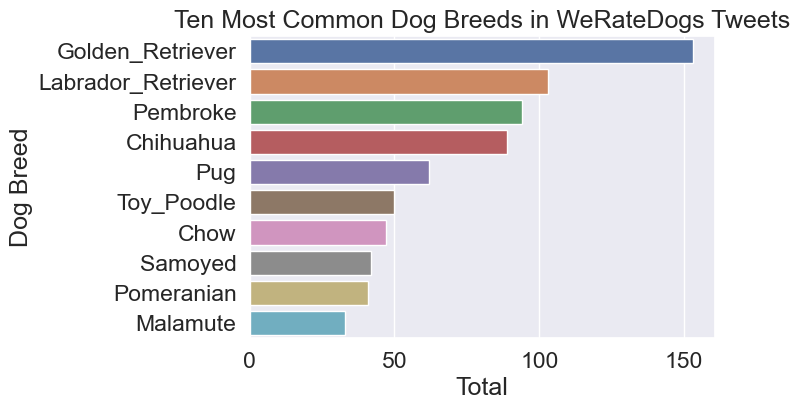

In [145]:
# Plot counts of the 10 most common dog breeds
top_breeds = (df_clean.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

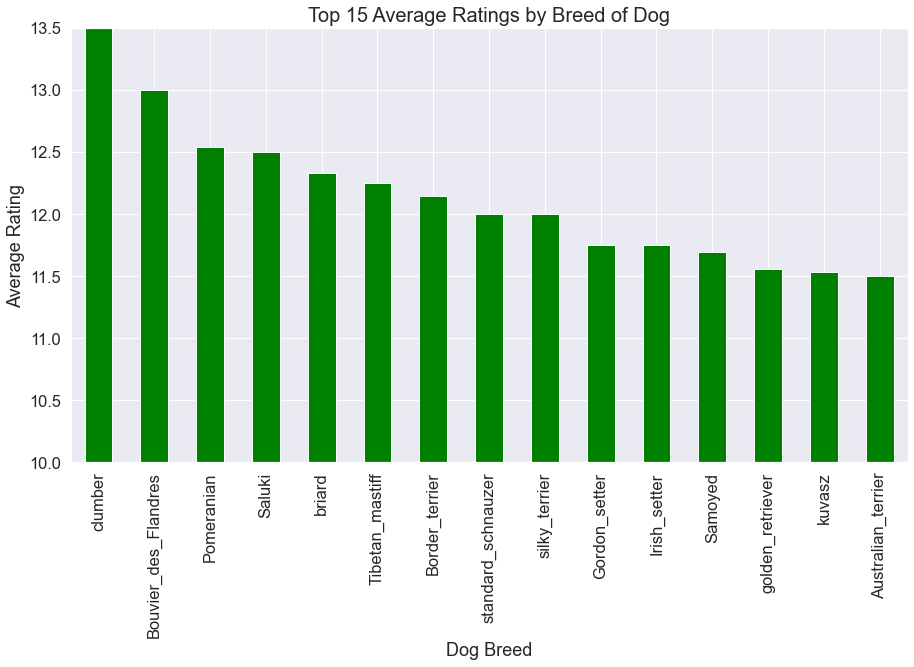

In [146]:
# GROUPING WILL HELP US TO GET THE AVERAGE RATING FOR THE TOP 15 BREED
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed')['dog_rating'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar', color ='green')
plt.title("Top 15 Average Ratings by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

Text(0.5, 1.0, 'Tweet Source')

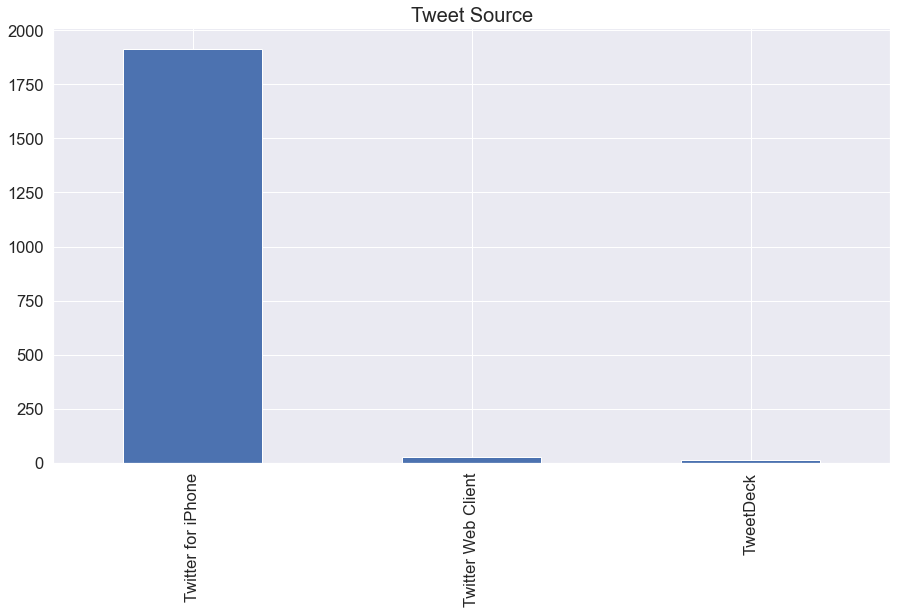

In [148]:
fig = plt.figure(figsize=(15,8))
df_clean.loc[df_clean['tweet_source'] == 'None', 'tweet_source'] = None
df_clean['tweet_source'].value_counts().plot(kind='bar')
plt.title("Tweet Source",fontsize=20)

# Thanks for Reviewing